Estrutura de dados no Pandas
* Series 
  * Array unidimencional -> como uma coluna no excel
  * Dataframe -> o excel todo

In [1]:
import pandas as pd
import numpy as np

In [3]:
series = pd.Series([7,8,9,10,11])
series

0     7
1     8
2     9
3    10
4    11
dtype: int64

In [4]:
type(series)

pandas.core.series.Series

In [6]:
#passando um ndarray
pd.Series(np.array(['f','h','i','j']),index=[1,2,3,4])

1    f
2    h
3    i
4    j
dtype: object

In [7]:
#passando um dicionário
pd.Series({'a':99,'b':12,'c':7,'d':56,'e':39})

a    99
b    12
c     7
d    56
e    39
dtype: int64

In [8]:
#passando constante
pd.Series(100, index = np.arange(1,11))

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
dtype: int64

Acessando os elementos de uma Series

In [11]:
np.random.seed(7)
data = np.random.randint(low = 1, high=100, size = 8)
index = ['a','b','c','d','e','f','g','h']
series = pd.Series(data, index = index)

In [12]:
series.head()

a    48
b    69
c    26
d    68
e    84
dtype: int32

In [13]:
series.tail()

d    68
e    84
f    24
g    93
h    58
dtype: int32

<AxesSubplot:>

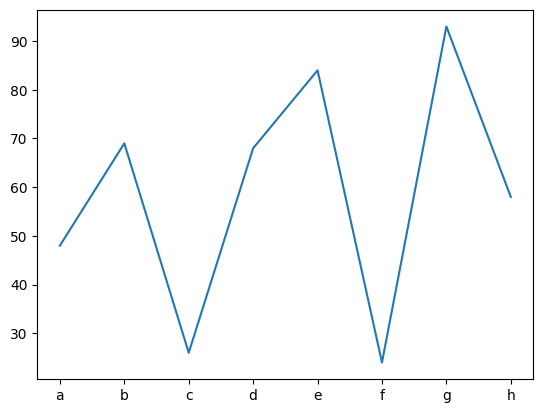

In [14]:
series.plot()

In [17]:
#primeiro elemento
series[0]
#outras formas
series[-1:]
series[:5]
series[1:5]

b    69
c    26
d    68
e    84
dtype: int32

Acessar o elemento pelo label

In [18]:
series['a']

48

In [22]:
series.get('a')

48

In [19]:
series['a':'d']

a    48
b    69
c    26
d    68
dtype: int32

In [20]:
series[['a','c','f']]

a    48
c    26
f    24
dtype: int32

Verificando atributos do objeto

In [23]:
series.shape

(8,)

In [24]:
series.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')

In [25]:
series.values

array([48, 69, 26, 68, 84, 24, 93, 58])

In [26]:
#numero de dimensões
series.ndim

1

In [27]:
type(series.values)

numpy.ndarray

Aplicando estatística descritiva 

In [28]:
notas = [7,9,8,5]
alunos = ['Lucas','Lais','Tales','Rebeca']
series = pd.Series(notas, index=alunos, name = 'Notas Matemática')

In [29]:
series

Lucas     7
Lais      9
Tales     8
Rebeca    5
Name: Notas Matemática, dtype: int64

In [30]:
series.mean()

7.25

In [31]:
#desvio padrão
series.std()

1.707825127659933

In [32]:
#variancia
series.var()

2.9166666666666665

In [33]:
series.median()

7.5

In [34]:
series.max()

9

In [35]:
series.idxmax()

'Lais'

In [36]:
series.min()

5

In [37]:
series.idxmin()

'Rebeca'

Operações com Series

In [49]:
np.random.seed(8)
n = 5
notas_biologia = pd.Series(np.random.randint(1,10,size=n))
notas_matematica = pd.Series(np.random.randint(1,10,size=n))

In [50]:
notas_biologia+notas_matematica

0     8
1    14
2     3
3    12
4    11
dtype: int32

In [41]:
notas_biologia-notas_matematica


0    0
1   -4
2    1
3    0
4    7
dtype: int32

In [42]:
notas_biologia/notas_matematica


0    1.000000
1    0.555556
2    2.000000
3    1.000000
4    4.500000
dtype: float64

In [43]:
notas_biologia*notas_matematica


0    16
1    45
2     2
3    36
4    18
dtype: int32

In [51]:
#media global
(notas_biologia+notas_matematica)/2

0    4.0
1    7.0
2    1.5
3    6.0
4    5.5
dtype: float64

In [52]:
notas_biologia>6

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [53]:
notas_biologia!=6

0     True
1     True
2     True
3    False
4     True
dtype: bool

In [54]:
notas_biologia[notas_biologia>=6]

3    6
4    9
dtype: int32

In [55]:
notas_biologia[notas_biologia==9]

4    9
dtype: int32

In [56]:
notas_biologia[notas_biologia!=9]


0    4
1    5
2    2
3    6
dtype: int32

In [57]:
#adicionando novas notas
notas_biologia[5]=9
notas_biologia[6]=9
notas_biologia[7]=4

In [59]:
#contando frequencias
notas_biologia.value_counts()

9    3
4    2
5    1
2    1
6    1
dtype: int64

In [61]:
#para ver como percentuais passar o normalize = True
notas_biologia.value_counts(normalize=True)*100

9    37.5
4    25.0
5    12.5
2    12.5
6    12.5
dtype: float64

Concatenação de Series

In [62]:
pd.concat([notas_biologia,notas_matematica],axis=0)

0    4
1    5
2    2
3    6
4    9
5    9
6    9
7    4
0    4
1    9
2    1
3    6
4    2
dtype: int64

In [64]:
notas = pd.concat([notas_biologia,notas_matematica],axis=1) #axis=1 concatena ao lado
notas

,0,1
0,4,4.0
1,5,9.0
2,2,1.0
3,6,6.0
4,9,2.0
5,9,NaN
6,9,NaN
7,4,NaN


In [65]:
notas.columns = ['Biologia','Matemática']

In [67]:
type(notas)

pandas.core.frame.DataFrame

In [68]:
notas.fillna(0,inplace=True)

In [69]:
notas['Media'] = notas.mean(axis=1)

In [70]:
notas

,Biologia,Matemática,Media
0,4,4.0,4.0
1,5,9.0,7.0
2,2,1.0,1.5
3,6,6.0,6.0
4,9,2.0,5.5
5,9,0.0,4.5
6,9,0.0,4.5
7,4,0.0,2.0


Visualização dos Dados